Задание 1

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams

rcParams['figure.figsize'] = 8, 8
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [173]:
from sklearn.datasets import load_boston
import warnings

warnings.filterwarnings('ignore')
boston = load_boston()
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target, columns=["price"])

In [174]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42) 

In [175]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [176]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components= 2, learning_rate=250, random_state=42)
x_train_scaled_tsne = tsne.fit_transform(x_train_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

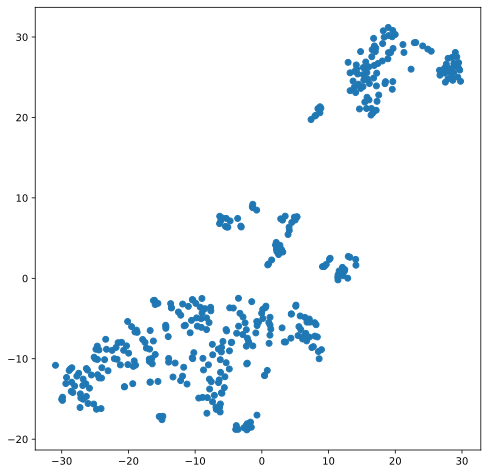

In [177]:
plt.scatter(x_train_scaled_tsne[:, 0], x_train_scaled_tsne[:, 1])
plt.show

Задание 2

<function matplotlib.pyplot.show(close=None, block=None)>

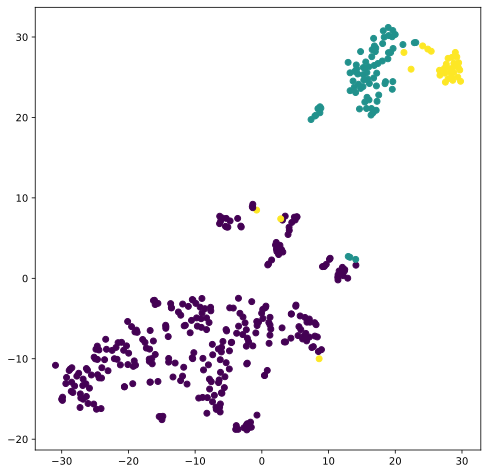

In [178]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(x_train)
plt.scatter(x_train_scaled_tsne[:, 0], x_train_scaled_tsne[:, 1], c=labels_train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

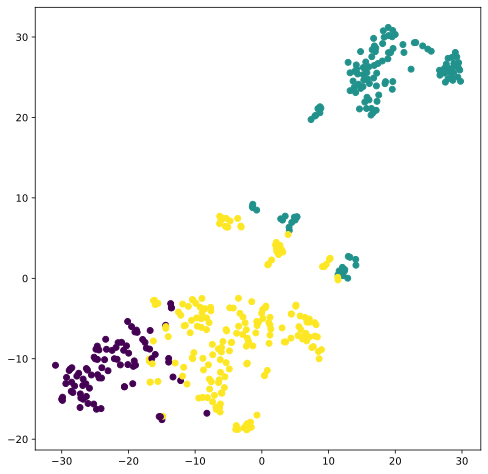

In [179]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(x_train_scaled)
plt.scatter(x_train_scaled_tsne[:, 0], x_train_scaled_tsne[:, 1], c=labels_train)
tsne_centers = TSNE(n_components= 2, learning_rate=250, random_state=42)
plt.show

In [180]:
#Средниие значения price
print(f'Кластер 0: {y_train[labels_train == 0].mean()}')
print(f'Кластер 1: {y_train[labels_train == 1].mean()}')
print(f'Кластер 2: {y_train[labels_train == 2].mean()}')

Кластер 0: price    27.788372
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    24.958115
dtype: float64


In [185]:
#Средниие значения CRIM
print(f'Кластер 0: {x_train.loc[labels_train == 0, "CRIM"].mean()}')
print(f'Кластер 0: {x_train.loc[labels_train == 1, "CRIM"].mean()}')
print(f'Кластер 0: {x_train.loc[labels_train == 2, "CRIM"].mean()}')

Кластер 0: 0.07356558139534884
Кластер 0: 10.797028425196851
Кластер 0: 0.4216602094240837


Задание 3


In [186]:
labels_test = model.predict(x_test_scaled)

In [187]:
#Средниие значения price
print(f'Кластер 0: {y_test[labels_test == 0].mean()}')
print(f'Кластер 1: {y_test[labels_test == 1].mean()}')
print(f'Кластер 2: {y_test[labels_test == 2].mean()}')

Кластер 0: price    31.35
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    21.860784
dtype: float64


In [188]:
#Средниие значения CRIM
print(f'Кластер 0: {x_test.loc[labels_test == 0, "CRIM"].mean()}')
print(f'Кластер 0: {x_test.loc[labels_test == 1, "CRIM"].mean()}')
print(f'Кластер 0: {x_test.loc[labels_test == 2, "CRIM"].mean()}')

Кластер 0: 0.06206
Кластер 0: 10.165531142857143
Кластер 0: 0.2660788235294118
